In [211]:
#Libraries 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [212]:
#Importing the data
train_data=pd.read_csv('/content/drive/MyDrive/Datasets/data.csv')

In [213]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
#Checking the Data
train_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


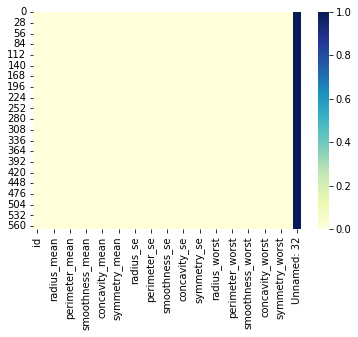

In [215]:
# Checking the null values
sns.heatmap(train_data.isnull(),cmap='YlGnBu')

In [216]:
# Dropping the null column
train_data=train_data.dropna(axis=1)
train_data.shape

(569, 32)

In [217]:
train_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [218]:
# Counts of Diagonsis M and B
train_data['diagnosis'].value_counts()
list1=[357,212]

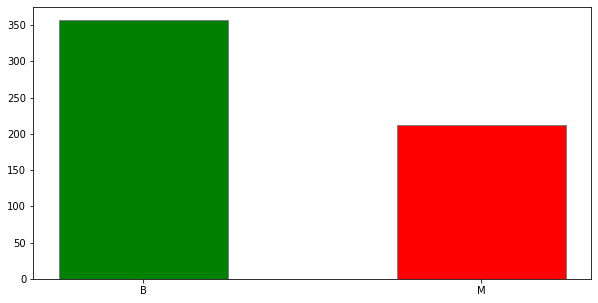

In [219]:
# Graph plot of count of M and B
values=np.linspace(0,500)
diagnosis=list(train_data['diagnosis'].value_counts())
train_data['diagnosis'].value_counts()
diagnosisTerms=['B','M']
fig = plt.figure(figsize = (10, 5))

plt.bar(diagnosisTerms[0],diagnosis[0], color ='Green', width = 0.5,edgecolor ='grey', label ='IT')
plt.bar(diagnosisTerms[1],diagnosis[1], color ='Red', width = 0.5,edgecolor ='grey', label ='ECE')
 
# plt.xlabel("Diagnosis")
# plt.ylabel("Count")
# plt.title("Count of Diagnosis")
plt.show()

In [220]:
train_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

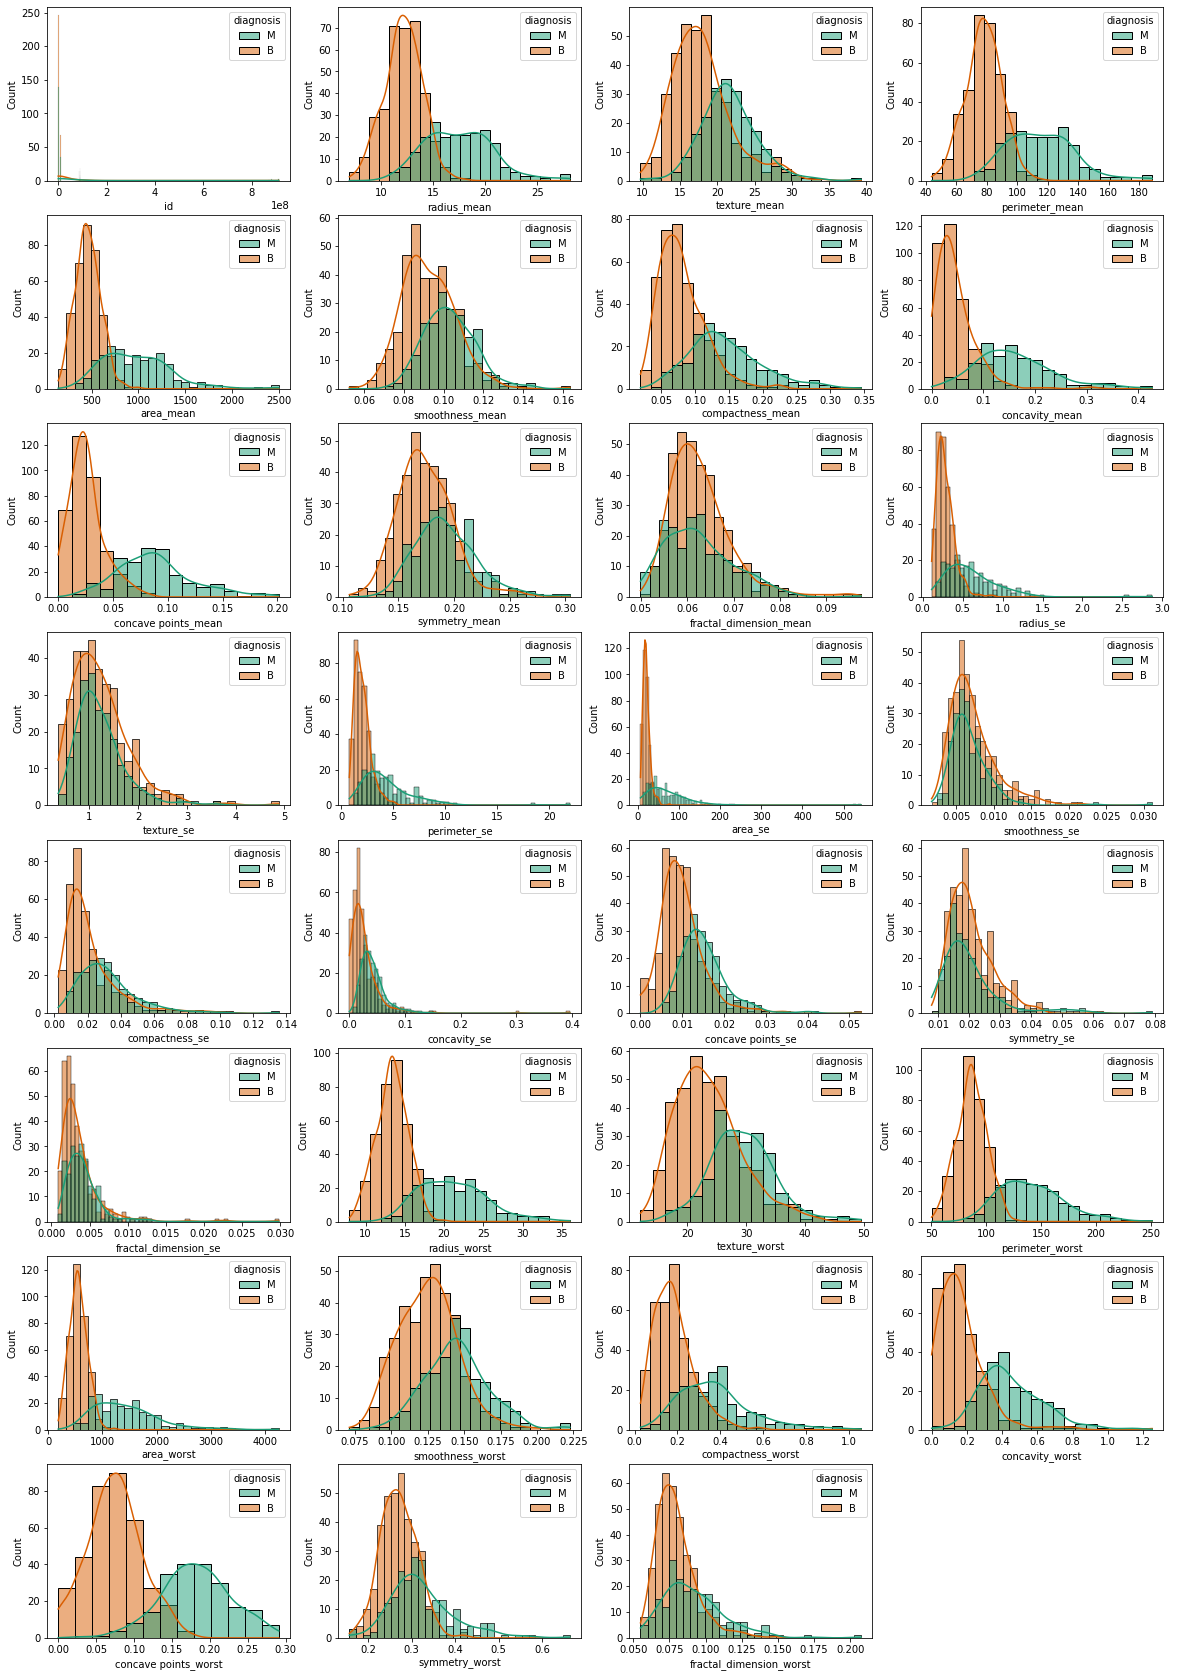

In [221]:
plt.figure(figsize = (20,30))
for _,col in enumerate(train_data.select_dtypes('number').columns):

    plt.subplot(8,4,_+1)
    sns.histplot(x = col, kde = True,hue = 'diagnosis' ,data = train_data,palette="Dark2")

plt.show()

In [222]:
train_data['diagnosis'] = train_data['diagnosis'].replace({'M':1,"B":0})

In [223]:
train_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


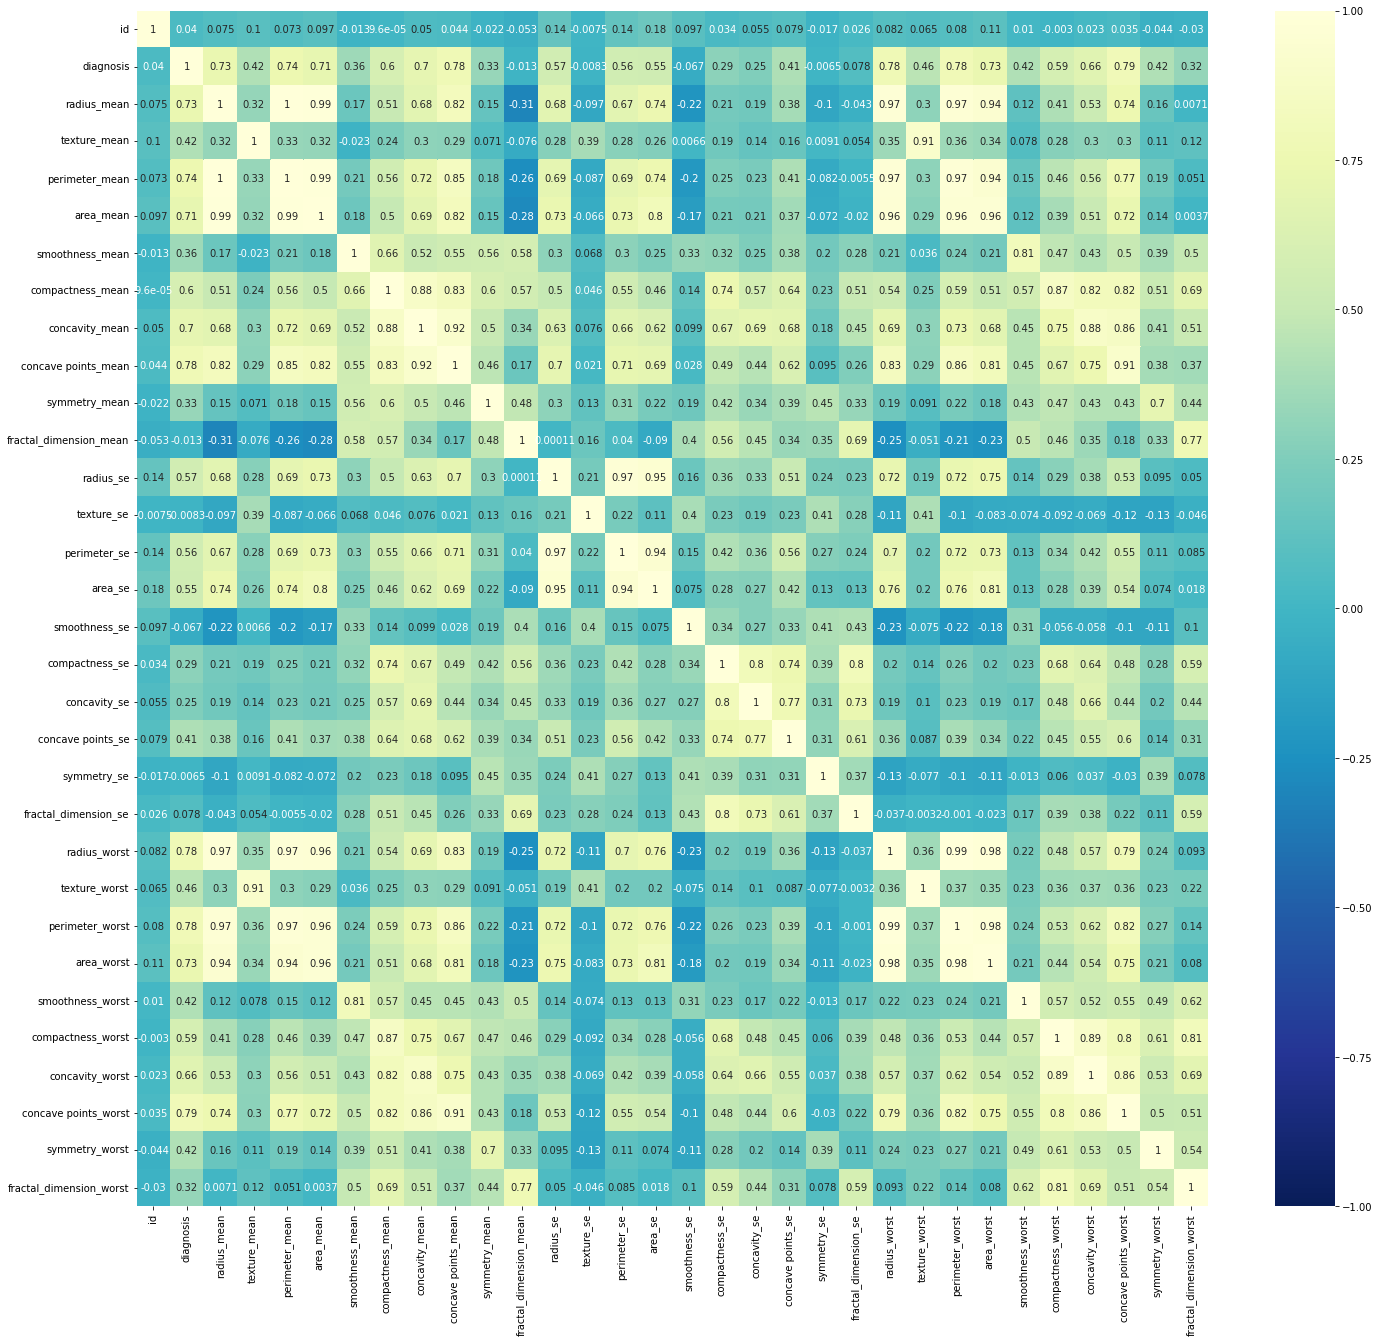

In [224]:
plt.figure(figsize = (24,22))
sns.heatmap(train_data.corr(), vmin = -1.0, vmax = 1.0, center = 0, cmap = 'YlGnBu_r', annot = True, data = train_data)
plt.show()

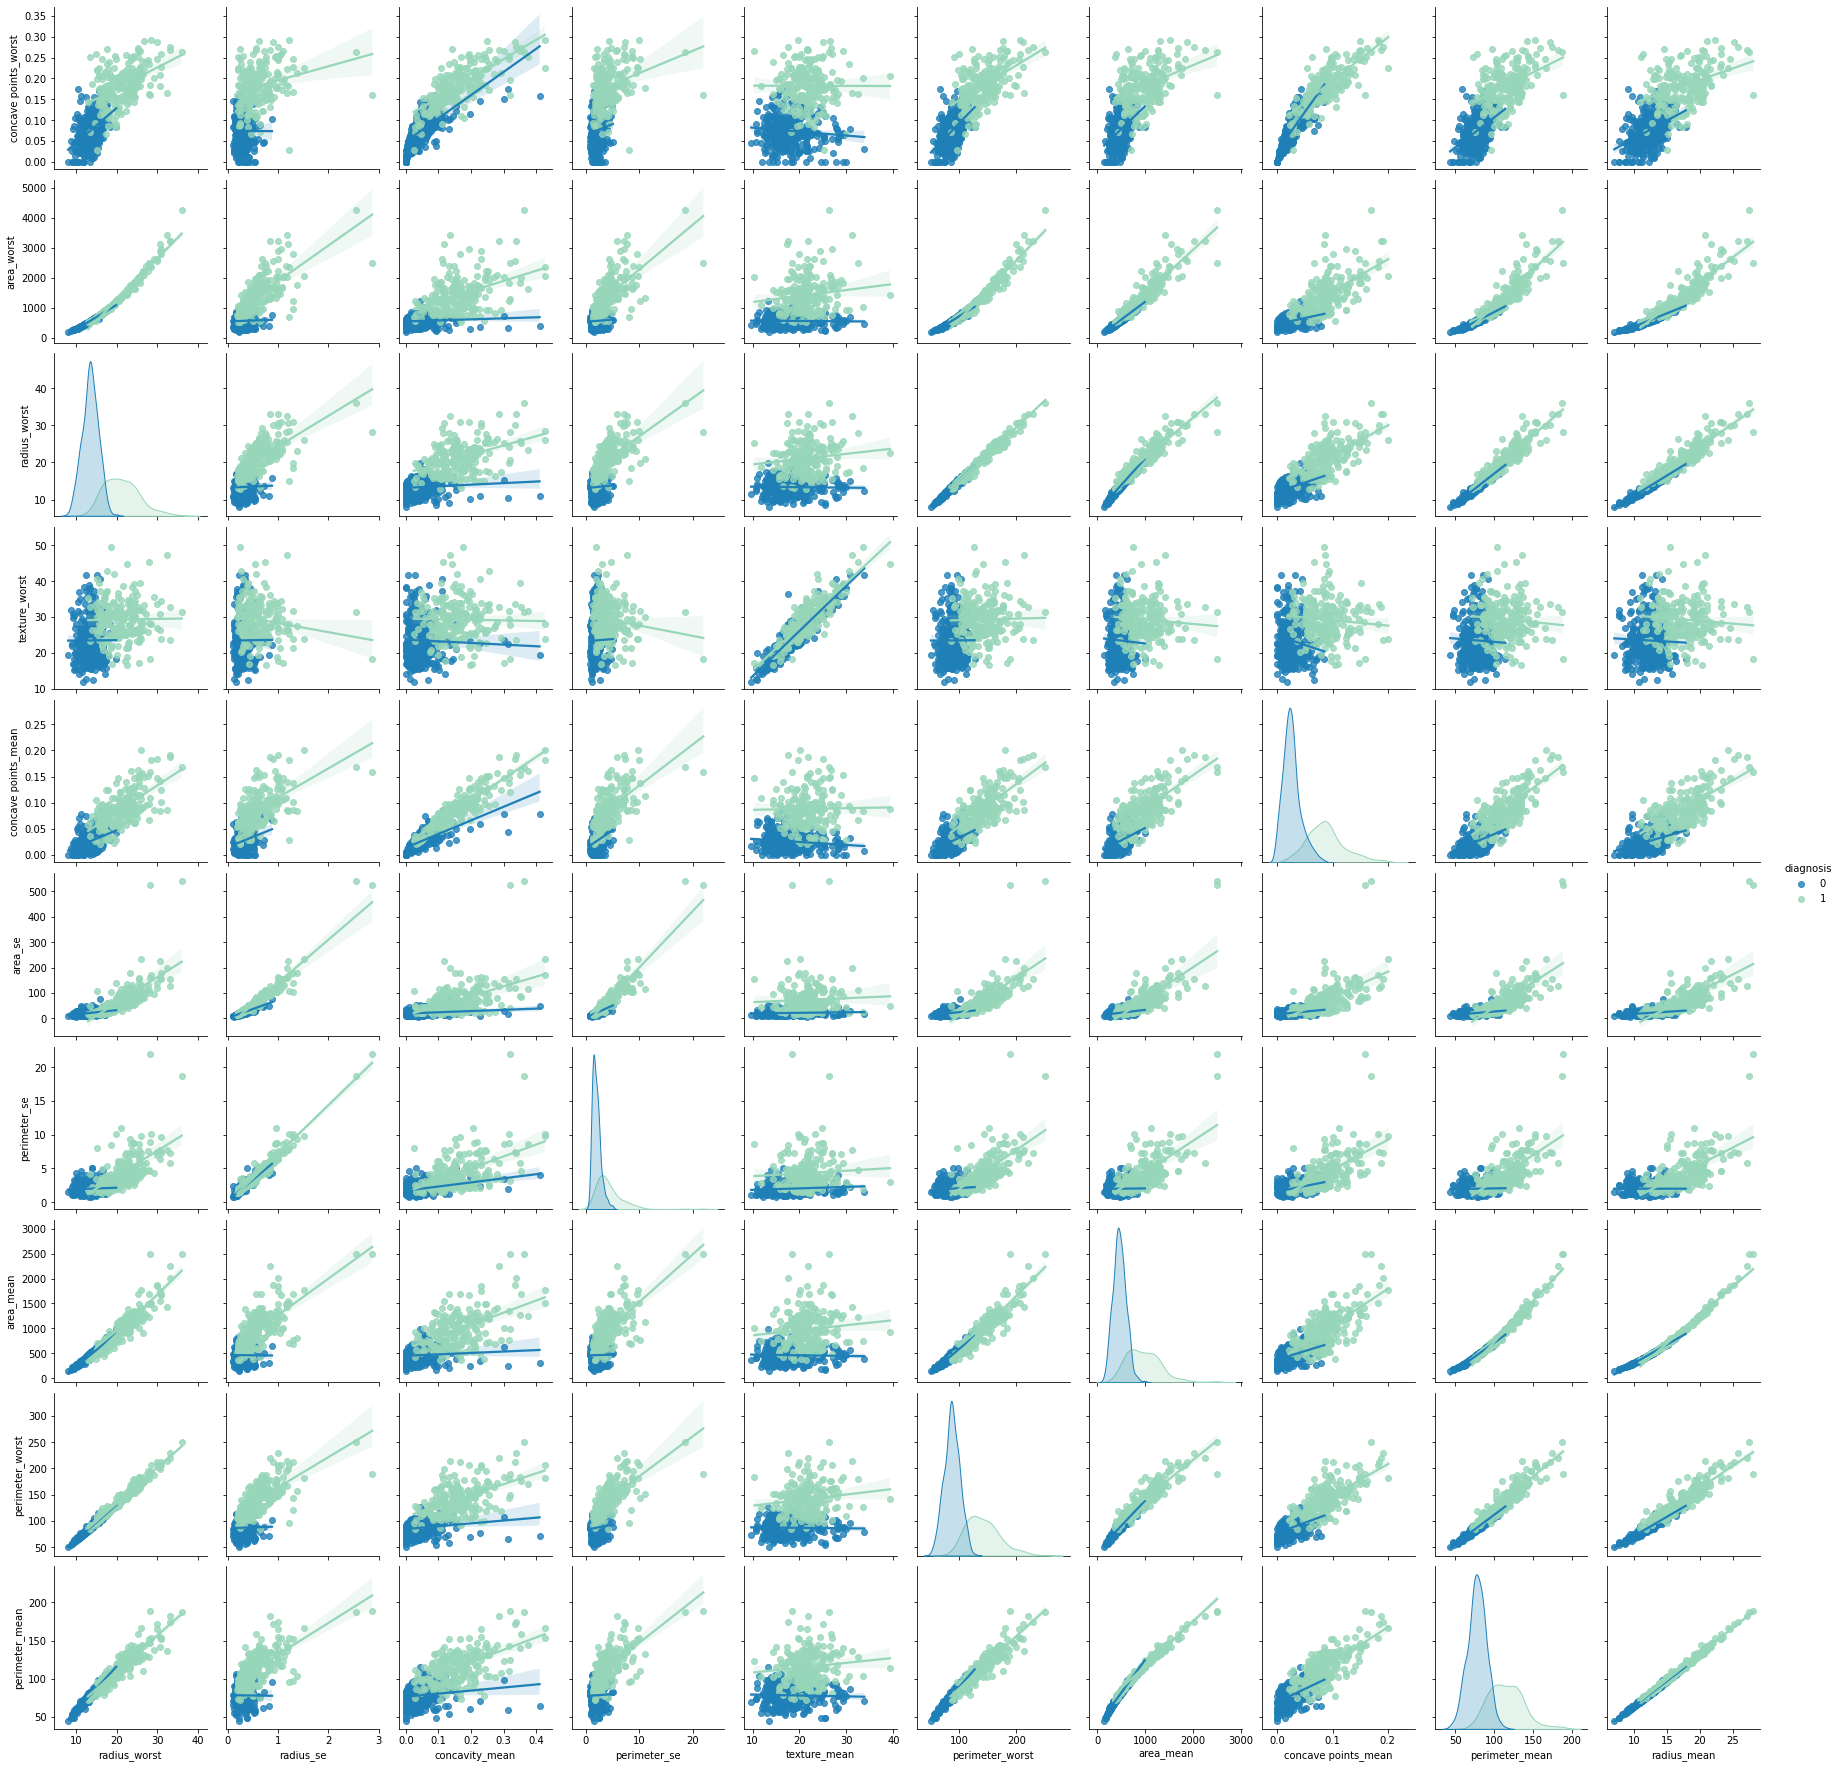

In [225]:
s1 = set()
s2 = set()
corr = train_data.corr()
for i in range(len(train_data.columns)):
    for j in range(i+1,len(train_data.columns)):
        col1 = train_data.columns[i]
        col2 = train_data.columns[j]
        if corr[col1][col2] >= 0.9 or corr[col1][col2] <= -0.9:
            s1.add(col1)
            s2.add(col2)
s1 = list(s1)
s2 = list(s2)
sns.pairplot(train_data,x_vars = s1, y_vars = s2, kind = 'reg', hue = 'diagnosis',palette="YlGnBu_r")
plt.show()

In [226]:
from sklearn.model_selection import train_test_split
X=train_data.iloc[:,2:32].values
y=train_data.iloc[:,1].values


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [228]:
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [229]:
from sklearn.neighbors import KNeighborsClassifier

7


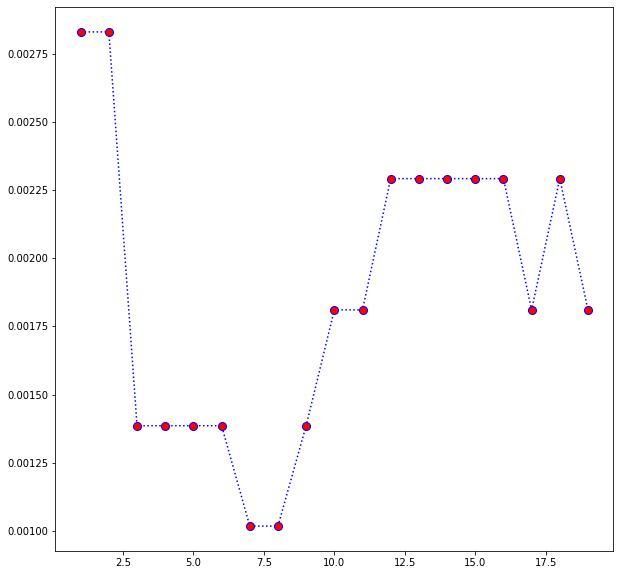

In [230]:
Error_rate = [] 
minError_K=21
mn=1
for _ in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=_) 
    knn.fit(X_train,y_train) 
    pred = knn.predict(X_test)
    Error_rate.append(np.square(np.mean(pred != y_test)))
    if(_==1):
      continue
    if np.square(np.mean(pred != y_test))<mn :
        minError_K=_;
        mn=np.square(np.mean(pred != y_test))

print(minError_K)
plt.figure(figsize=(10,10)) 
plt.plot(range(1,20),Error_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)
plt.title = 'K VS Mean Squared Error'
plt.xlabel = 'K'
plt.ylabel= 'Mean Squared Error' 
plt.show()

In [231]:
knn = KNeighborsClassifier(n_neighbors=minError_K,p=2)
knn.fit(X_train,y_train)
KNeighborsClassifier(n_neighbors=minError_K)
y_pred = knn.predict(X_test)

In [232]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9680851063829787

In [233]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train,y_train)
print('[0]logistic regression accuracy:',log.score(X_train,y_train))

[0]logistic regression accuracy: 0.9868766404199475


In [234]:
data_df=train_data.loc[:,train_data.columns!='id']
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [235]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
# To scale data
scaler.fit(train_data.loc[:, train_data.columns != 'id'])
scaled = scaler.transform(data_df)
print(len(scaled[0]))
colList=[]
for col in train_data.columns:
    colList.append(col)
colList.remove('id')
scaled= pd.DataFrame(scaled,columns=colList)

31


In [236]:
train_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [237]:
scaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [238]:
scaled.rename(columns={'diagnosis':'values'},inplace='True')

In [239]:
# Adding diagnosis to scaled 
# data_df.head()
list_diag=data_df['diagnosis']
scaled['diagnosis']=list_diag.tolist()

In [240]:
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.1% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

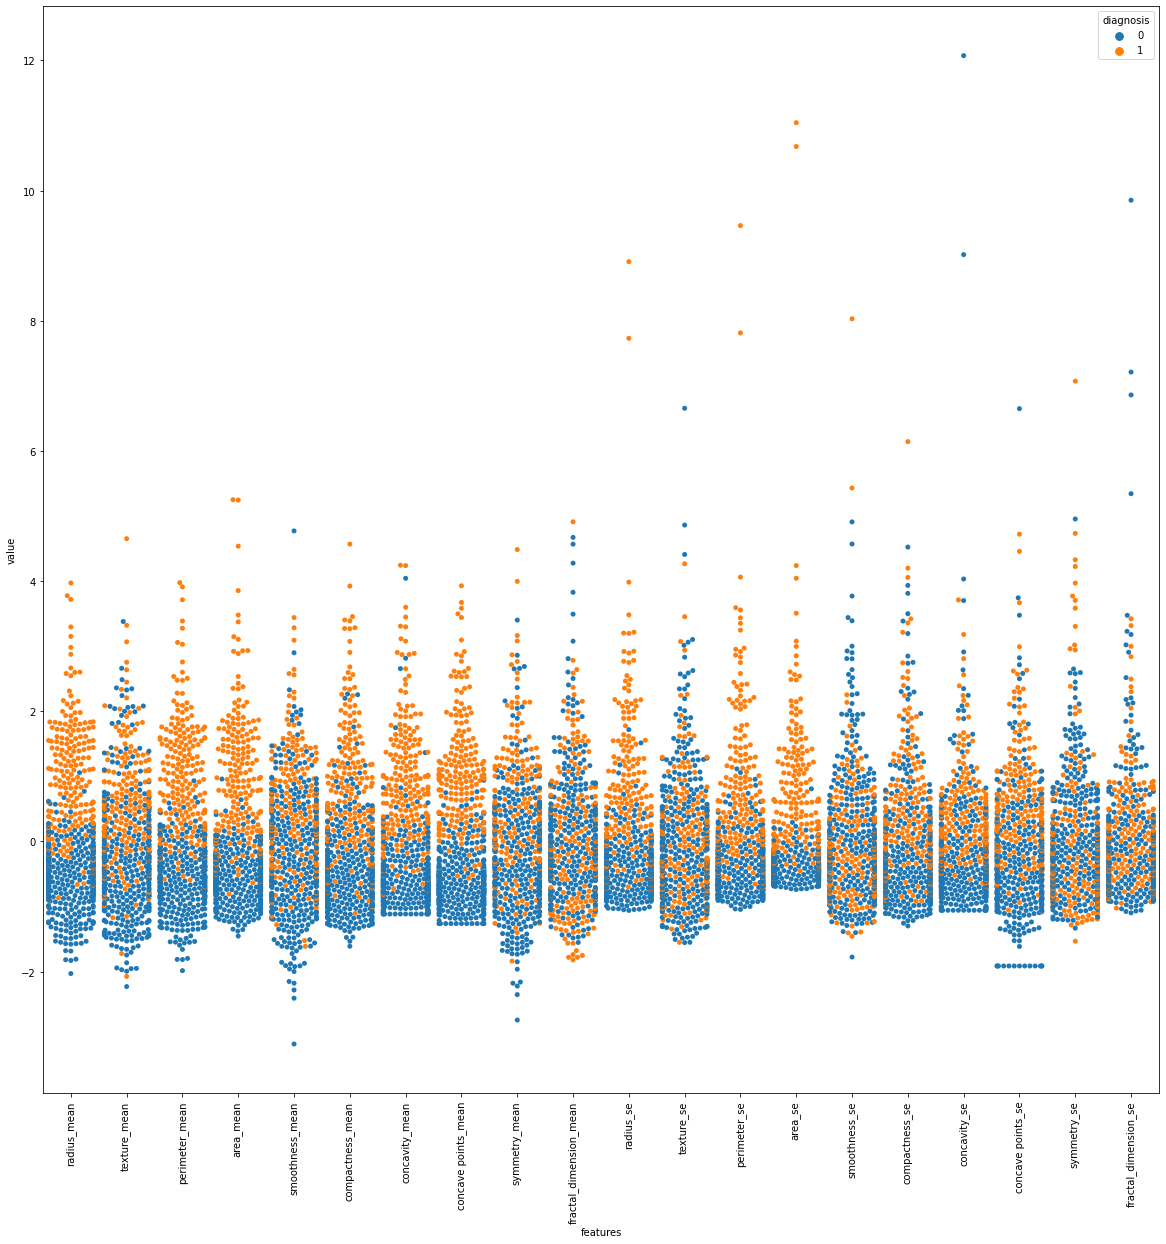

In [241]:

x= train_data.drop(columns=['diagnosis'],axis =1)
y = train_data['diagnosis']

data = pd.concat([y,scaled.iloc[:,1:21]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.0% of the points cannot be placed; y

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

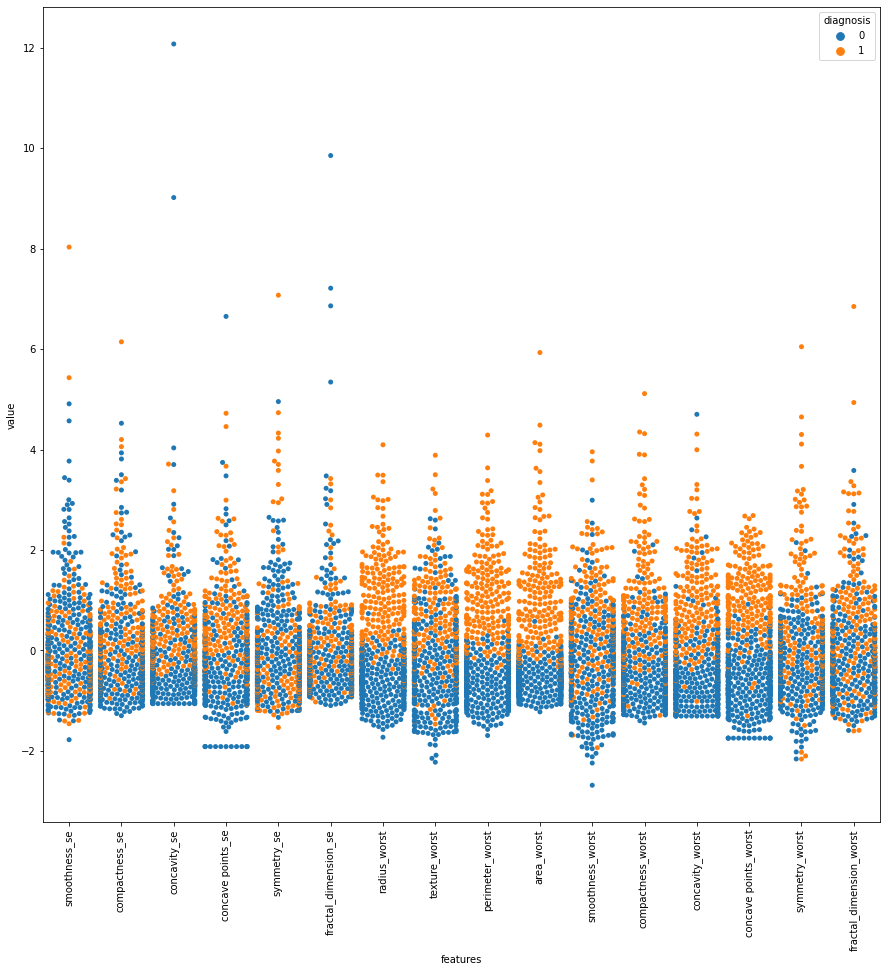

In [242]:
data = pd.concat([y,scaled.iloc[:,15:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

In [243]:
pd.set_option('display.max_columns', 5000)
train_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [244]:
thresh= 0.8
print(X_train.mean())
print(X_train.std())
X_train_scaled = (X_train - X_train.mean()) / (X_train.std()) 
X_train_scaled = pd.DataFrame(X_train_scaled)
y_train_dataframe= pd.DataFrame(y_train)

df_train_scaled = pd.concat([y_train_dataframe, X_train_scaled],axis=1)
correlation_matrix = df_train_scaled.corr().abs()
uper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop_corr = [column for column in uper.columns if any(uper[column] > thresh)]



-2.536320526597733e-16
1.0


In [245]:
train_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [246]:
from sklearn import feature_selection
def build_feature(data,list):
  feature_df=[]
  for i in range(len(list)):
    x=0
    print(i,"i")
    for column in data:
      if(x==list[i]):
        feature_df.append(data[column])
        print(x)
        break
      x=x+1

  return feature_df

In [247]:
feature_df=build_feature(train_data,to_drop_corr)

0 i
2
1 i
3
2 i
6
3 i
7
4 i
12
5 i
13
6 i
16
7 i
20
8 i
21
9 i
22
10 i
23
11 i
25
12 i
26
13 i
27


In [248]:
feature_df=pd.DataFrame(feature_df)

In [249]:
feature_df=feature_df.T
feature_df


,radius_mean,texture_mean,smoothness_mean,compactness_mean,radius_se,texture_se,smoothness_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst
0,17.99,10.38,0.11840,0.27760,1.0950,0.9053,0.006399,0.03003,0.006193,25.380,17.33,2019.0,0.16220,0.66560
1,20.57,17.77,0.08474,0.07864,0.5435,0.7339,0.005225,0.01389,0.003532,24.990,23.41,1956.0,0.12380,0.18660
2,19.69,21.25,0.10960,0.15990,0.7456,0.7869,0.006150,0.02250,0.004571,23.570,25.53,1709.0,0.14440,0.42450
3,11.42,20.38,0.14250,0.28390,0.4956,1.1560,0.009110,0.05963,0.009208,14.910,26.50,567.7,0.20980,0.86630
4,20.29,14.34,0.10030,0.13280,0.7572,0.7813,0.011490,0.01756,0.005115,22.540,16.67,1575.0,0.13740,0.20500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,1.1760,1.2560,0.010300,0.01114,0.004239,25.450,26.40,2027.0,0.14100,0.21130
565,20.13,28.25,0.09780,0.10340,0.7655,2.4630,0.005769,0.01898,0.002498,23.690,38.25,1731.0,0.11660,0.19220
566,16.60,28.08,0.08455,0.10230,0.4564,1.0750,0.005903,0.01318,0.003892,18.980,34.12,1124.0,0.11390,0.30940
567,20.60,29.33,0.11780,0.27700,0.7260,1.5950,0.006522,0.02324,0.006185,25.740,39.42,1821.0,0.16500,0.86810


In [250]:
from sklearn.model_selection import train_test_split
X1=feature_df.iloc[:,2:len(to_drop_corr)].values
y1=train_data.iloc[:,1].values



In [251]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [252]:
from sklearn.preprocessing import StandardScaler
X1_train=StandardScaler().fit_transform(X1_train)
X1_test=StandardScaler().fit_transform(X1_test)

In [253]:
from sklearn.neighbors import KNeighborsClassifier

4


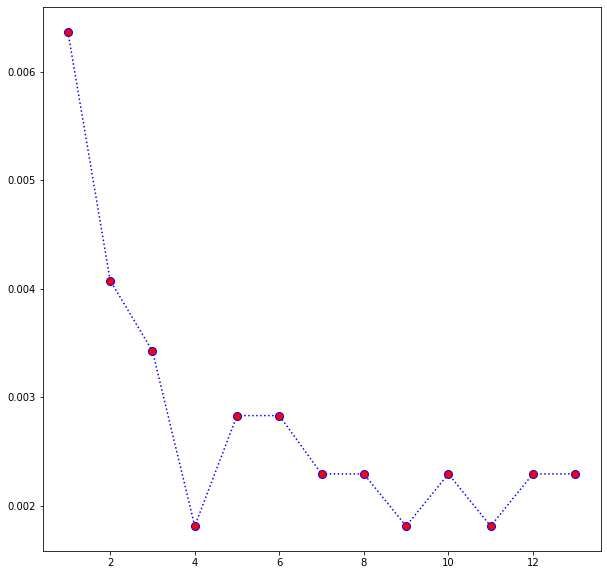

In [254]:
Error_rate = [] 
minError_K=len(to_drop_corr)
mn=1
for _ in range(1,len(to_drop_corr)):
    knn = KNeighborsClassifier(n_neighbors=_) 
    knn.fit(X1_train,y1_train) 
    pred = knn.predict(X1_test)
    Error_rate.append(np.square(np.mean(pred != y1_test)))
    if(_==1):
      continue
    if np.square(np.mean(pred != y1_test))<mn :
        minError_K=_;
        mn=np.square(np.mean(pred != y1_test))

print(minError_K)
plt.figure(figsize=(10,10)) 
plt.plot(range(1,len(to_drop_corr)),Error_rate,color='blue',linestyle='dotted',marker='o',markerfacecolor='red',markersize=8)
plt.title = 'K VS Mean Squared Error'
plt.xlabel = 'K'
plt.ylabel= 'Mean Squared Error' 
plt.show()

In [255]:
knn = KNeighborsClassifier(n_neighbors=minError_K,p=1)
knn.fit(X1_train,y1_train)
KNeighborsClassifier(n_neighbors=minError_K)
y1_pred = knn.predict(X1_test)

In [256]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test,y1_pred)

0.9627659574468085

In [257]:
from sklearn.metrics import accuracy_score
mx=0
for k in range(1,len(to_drop_corr)):
  knn = KNeighborsClassifier(n_neighbors=k,p=1)
  knn.fit(X1_train,y1_train)
  KNeighborsClassifier(n_neighbors=k)
  y1_pred = knn.predict(X1_test)
  mx=max(accuracy_score(y1_test,y1_pred),mx)
  print(accuracy_score(y1_test,y1_pred),k)
print(mx)

0.9148936170212766 1
0.9468085106382979 2
0.9521276595744681 3
0.9627659574468085 4
0.9574468085106383 5
0.9574468085106383 6
0.9627659574468085 7
0.9468085106382979 8
0.973404255319149 9
0.9627659574468085 10
0.9627659574468085 11
0.9627659574468085 12
0.973404255319149 13
0.973404255319149


Accuracy confirmed! : 96.27659574468085
precision : 96.875
recall : 92.53731343283582


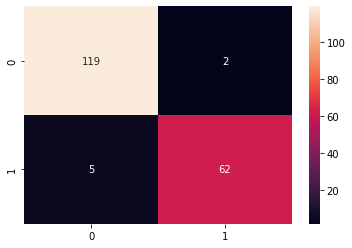

In [258]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7,p=1)
knn.fit(X1_train,y1_train)
KNeighborsClassifier(n_neighbors=7)
y1_pred = knn.predict(X1_test)

cm = confusion_matrix(y1_test,y1_pred)
sns.heatmap(cm,annot=True,fmt="d")


tn, fp, fn, tp = cm.ravel()
accuracy = np.sum(tp + tn) / (tn + fp + fn + tp)
print('Accuracy confirmed! :', accuracy*100)
precision = tp / (tp + fp)
print('precision :', precision*100)
recall = tp / (tp + fn)
print('recall :', recall*100)

In [259]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
# find best scored 10 features
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=42)
select_feature = SelectKBest(score_func=chi2, k=12).fit(X2_train, y2_train) #note chi2 only works on non-negative data (you can use MaxAbsScale to ensure)

In [260]:
cols = select_feature.get_support(indices=True)
# features_df_new = X2_train.iloc[:,cols]
features_data_new=X2_train[:,cols]
# pd.DataFrame(data= pd.DataFrame(select_feature.scores_))
# pd.DataFrame(data= select_feature.scores_, columns= features_df_new.columns.values)
features_data_new

array([[1.374e+01, 1.791e+01, 8.812e+01, ..., 9.719e+01, 7.259e+02,
        1.564e-01],
       [1.337e+01, 1.639e+01, 8.610e+01, ..., 9.199e+01, 6.321e+02,
        3.308e-01],
       [1.469e+01, 1.398e+01, 9.822e+01, ..., 1.141e+02, 8.092e+02,
        3.219e-01],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 9.444e+01, 6.846e+02,
        3.866e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.139e+02, 8.693e+02,
        4.069e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 8.458e+01, 5.478e+02,
        1.145e-01]])

Accuracy is:  0.9766081871345029


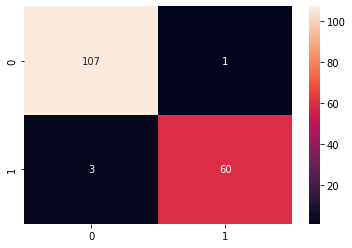

In [261]:
X_train_2 = select_feature.transform(X2_train)
X_test_2 = select_feature.transform(X2_test)
#random forest classifier with n_estimators=10 (default)
rf_cf_2 = RandomForestClassifier(random_state=42)      
clr_rf_2 = rf_cf_2.fit(X_train_2,y2_train)
ac_2 = accuracy_score(y2_test,rf_cf_2.predict(X_test_2))
print('Accuracy is: ', ac_2)
cm_2 = confusion_matrix(y2_test,rf_cf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [262]:
from sklearn.feature_selection import RFECV

rf_cf_4 = RandomForestClassifier(random_state=42) 
rfecv = RFECV(estimator=rf_cf_4, step=1, cv=2,scoring='accuracy')   #10-fold cross-validation
rfecv = rfecv.fit(X2_train, y2_train)

print('Optimal number of features :', rfecv.n_features_)
X2_train
x=0
bestFeatures=[]
for i in rfecv.support_ :
  if(i==True):
    bestFeatures.append(X2_train[x])
  x=x+1
print(bestFeatures)
print('Best features :', rfecv.support_)

Optimal number of features : 30
[array([1.374e+01, 1.791e+01, 8.812e+01, 5.850e+02, 7.944e-02, 6.376e-02,
       2.881e-02, 1.329e-02, 1.473e-01, 5.580e-02, 2.500e-01, 7.574e-01,
       1.573e+00, 2.147e+01, 2.838e-03, 1.592e-02, 1.780e-02, 5.828e-03,
       1.329e-02, 1.976e-03, 1.534e+01, 2.246e+01, 9.719e+01, 7.259e+02,
       9.711e-02, 1.824e-01, 1.564e-01, 6.019e-02, 2.350e-01, 7.014e-02]), array([1.337e+01, 1.639e+01, 8.610e+01, 5.535e+02, 7.115e-02, 7.325e-02,
       8.092e-02, 2.800e-02, 1.422e-01, 5.823e-02, 1.639e-01, 1.140e+00,
       1.223e+00, 1.466e+01, 5.919e-03, 3.270e-02, 4.957e-02, 1.038e-02,
       1.208e-02, 4.076e-03, 1.426e+01, 2.275e+01, 9.199e+01, 6.321e+02,
       1.025e-01, 2.531e-01, 3.308e-01, 8.978e-02, 2.048e-01, 7.628e-02]), array([1.469e+01, 1.398e+01, 9.822e+01, 6.561e+02, 1.031e-01, 1.836e-01,
       1.450e-01, 6.300e-02, 2.086e-01, 7.406e-02, 5.462e-01, 1.511e+00,
       4.795e+00, 4.945e+01, 9.976e-03, 5.244e-02, 5.278e-02, 1.580e-02,
       2.653e-

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


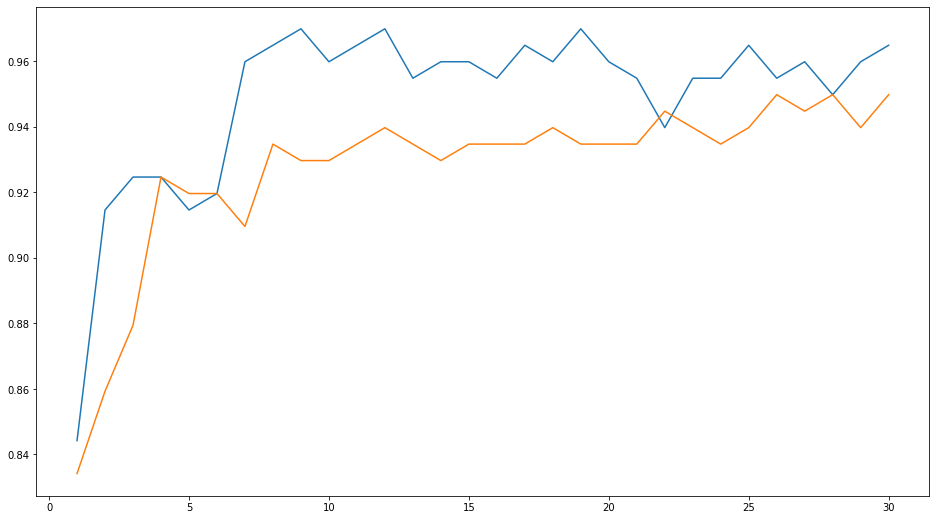

In [263]:
import matplotlib.pyplot as plt2

plt2.figure(figsize=(16,9))

plt2.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt2.show()

Accuracy is:  0.9707602339181286


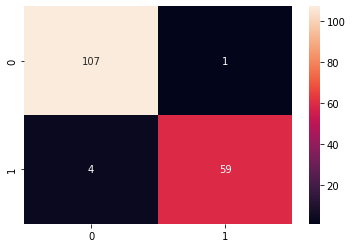

In [264]:
X_train_2 = rfecv.transform(X2_train)
X_test_2 = rfecv.transform(X2_test)

rf_cf_2 = RandomForestClassifier(random_state=42)      
rf_cf_2 = rf_cf_2.fit(X_train_2,y2_train)
ac_2 = accuracy_score(y2_test,rf_cf_2.predict(X_test_2))
print('Accuracy is: ', ac_2)
cm_2 = confusion_matrix(y2_test,rf_cf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

The accuracy of random forest  is:  0.9707602339181286
Accuracy confirmed! : 97.07602339181285
precision : 96.7741935483871
recall : 95.23809523809523


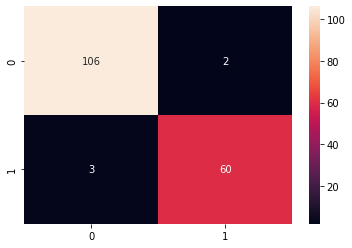

In [265]:
threshold= 0.8

X_train_scaled2 = (X2_train - X2_train.mean()) / (X2_train.std()) 
X_train_scaled2 = pd.DataFrame(X_train_scaled2)
y_train_dataframe= pd.DataFrame(y_train)

df_train_scaled = pd.concat([y_train_dataframe, X_train_scaled2],axis=1)
correlation_matrix = df_train_scaled.corr().abs()
uper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool))
to_drop_corr2 = [column for column in uper.columns if any(uper[column] > threshold)]

X_train_dataframe= pd.DataFrame(X2_train)

X1_train = X_train_dataframe.drop(to_drop_corr2,axis = 1)
X_test_dataframe= pd.DataFrame(X2_test)
X1_test = X_test_dataframe.drop(to_drop_corr2,axis = 1)
class_ref = RandomForestClassifier(random_state = 42)
class_ref =  class_ref.fit(X1_train,y2_train)
ac = accuracy_score(y2_test,class_ref.predict(X1_test))
print('The accuracy of random forest  is: ',ac)
cm = confusion_matrix(y2_test,class_ref.predict(X1_test))
sns.heatmap(cm,annot=True,fmt="d")
tn, fp, fn, tp = cm.ravel()
accuracy = np.sum(tp + tn) / (tn + fp + fn + tp)
print('Accuracy confirmed! :', accuracy*100)
precision = tp / (tp + fp)
print('precision :', precision*100)
recall = tp / (tp + fn)
print('recall :', recall*100)

Feature ranking:
27 :			 0.1513623206482221
22 :			 0.13020606897044307
23 :			 0.10716894136174486
7 :			 0.10503540920800351
20 :			 0.06988483875494939
6 :			 0.06379345557495904
0 :			 0.04860548726992913
13 :			 0.04814832546835794
3 :			 0.03862115632194694
2 :			 0.03341166849349213
26 :			 0.031851190889281025
25 :			 0.02755655136007837
21 :			 0.01723018720636682
1 :			 0.015076704880795001
28 :			 0.013969436765862991
10 :			 0.011652280399411866
24 :			 0.010804234626915139
12 :			 0.009418542229939887
5 :			 0.008567654559926767
16 :			 0.00742435807911199
4 :			 0.006894489551606398
19 :			 0.006087467840186001
29 :			 0.005705503302950089
14 :			 0.005184810666863016
8 :			 0.005130356680293687
18 :			 0.0049627488083011
15 :			 0.004928401038966033
11 :			 0.00446470963819815
17 :			 0.003581896332932259
9 :			 0.003270803069965144


<BarContainer object of 30 artists>

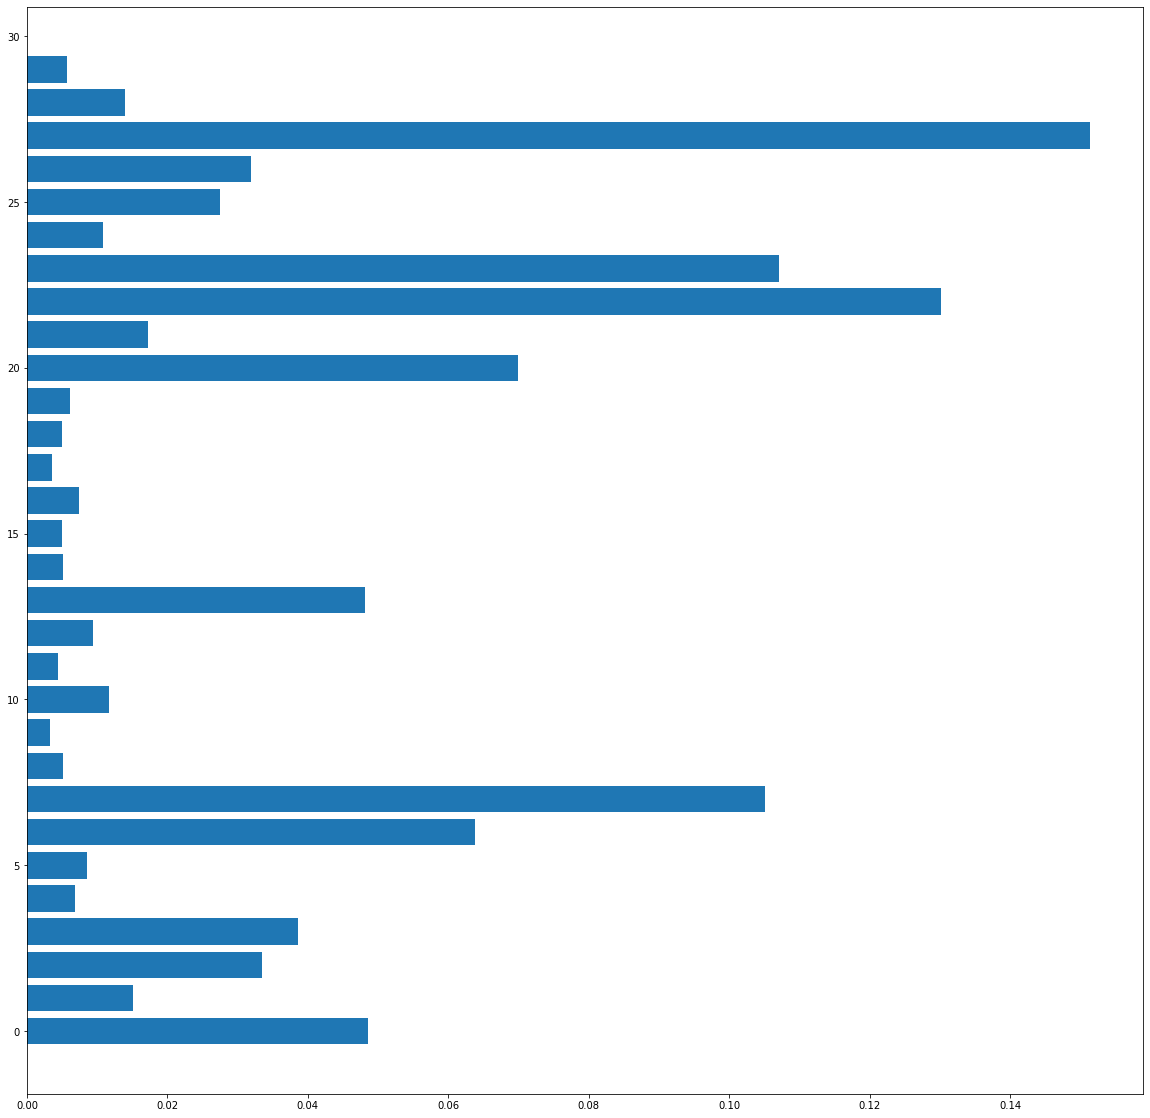

In [266]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X2_train,y2_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in class_ref.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(X_train_dataframe.columns.values[indices[f]], ":\t\t\t", importances[indices[f]])



plt.figure(1, figsize=(20, 20))
plt.barh(X_train_dataframe.columns.values[importances.argsort()], importances[importances.argsort()])

In [270]:
from sklearn.decomposition import PCA

# standardization
stand_training = StandardScaler()
X_train = stand_training.fit_transform(X_train)
X_test = stand_training.transform(X_test)

# Principal component analysis
pca = PCA(n_components=4)
Z_train = pca.fit_transform(X_train)
Z_test = pca.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


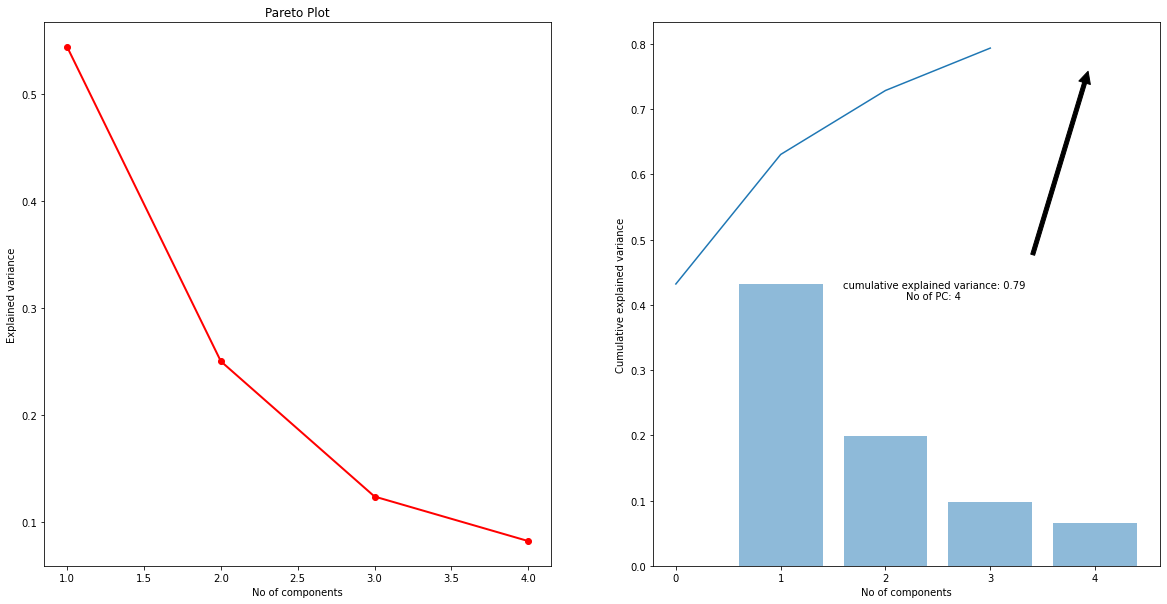

In [278]:
Eigen_Values = pca.explained_variance_
ell = pca.explained_variance_ratio_


# Scree plot
plt.subplots(1, 2, figsize = (20, 10))

axis = plt.subplot(1, 2, 1)
x = np.arange(len(Eigen_Values)) + 1
axis.plot(x, Eigen_Values / Eigen_Values.sum(), 'ro-', lw=2)
axis.set_xticks(x, ["" + str(i) for i in x])
axis.set_xlabel('No of components')
axis.set_ylabel('Explained variance')
axis.set_title('Scree Plot')

# Pareto plot
axis2 = plt.subplot(1, 2, 2)
ind = np.arange(1, len(ell) + 1)
axis2.bar(ind, ell, align='center', alpha=0.5)
axis2.plot(np.cumsum(ell))
axis2.set_xlabel('No of components')
axis2.set_ylabel('Cumulative explained variance')
axis.set_title('Pareto Plot')

for x, y in zip(ind, np.cumsum(ell)):
    label = "{:.2f}".format(y)
    if float(label) >= 0.79:
        plt.annotate("cumulative explained variance: " + label + "\n" +
                     "No of PC: " + str(x),  
                     (x, y), 
                     textcoords='figure fraction',  
                     xytext=(.8, 0.5), 
                     arrowprops=dict(facecolor='black', shrink=0.1),
                     horizontalalignment='left',
                     verticalalignment='bottom',
                     ha='center')  
        NUMBER_OF_PCs = x 
        break

In [272]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
x_pca = pca.transform(X_train)

In [273]:
x_pca.shape

(381, 4)

In [275]:
x_pca[:1]

array([[ 2.81157075,  1.2664135 , -2.27093405, -2.8119527 ]])

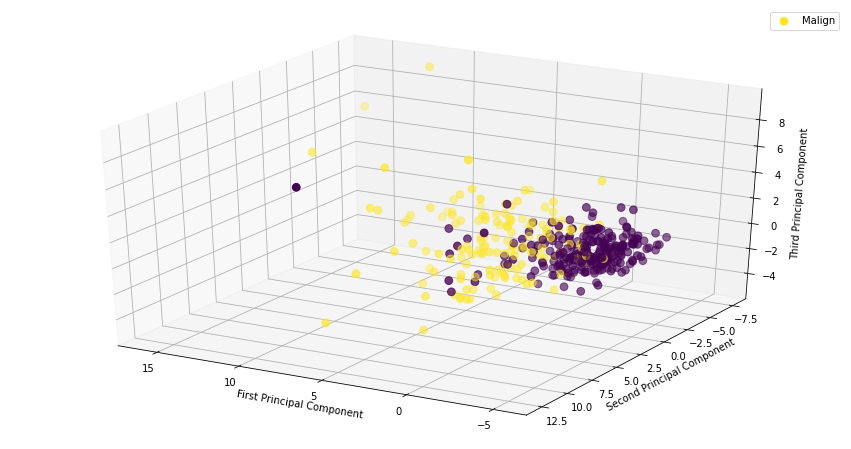

In [276]:
fig = plt.figure(figsize=(15, 8))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=y_train, s=60)
axis.legend(['Malign'])
axis.set_xlabel('First Principal Component')
axis.set_ylabel('Second Principal Component')
axis.set_zlabel('Third Principal Component')
axis.view_init(30, 120)

In [277]:
df_features = train_data.drop(['id'], axis=1)
df_features = df_features.drop(['diagnosis'], axis=1)
x= train_data.drop(columns=['diagnosis'],axis =1)
df_pc = pd.DataFrame(pca.components_, columns = df_features.columns)

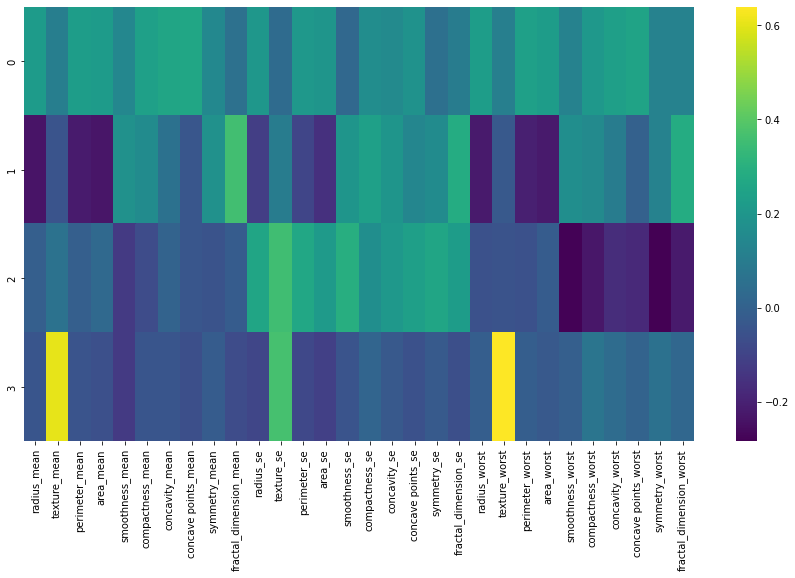

In [279]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap='viridis')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


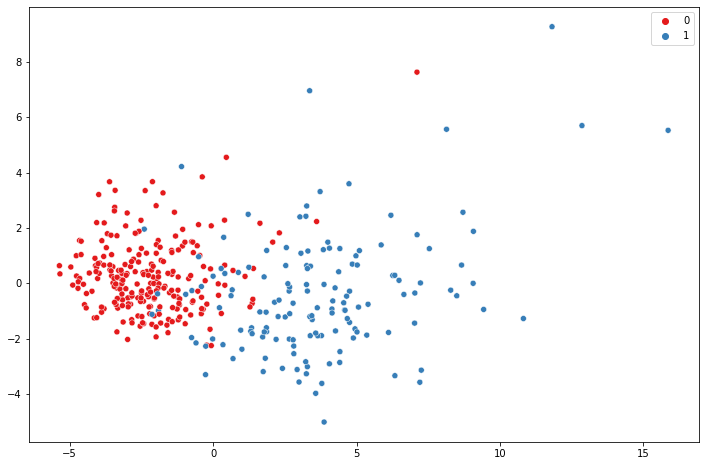

In [280]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,2],hue=y_train, palette ='Set1' )
#plt.xlabel('First Principal Component')
#plt.ylabel('Third Principal Component')

Accuracy is:  0.9532163742690059


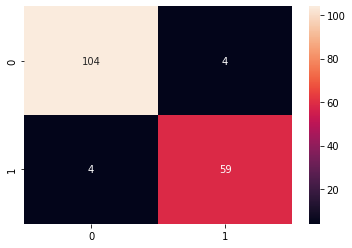

In [281]:
pca = PCA(n_components=6, whiten=True)
pca.fit(X_train_scaled2)
X_test_scaled = (X2_test - X2_test.mean()) / (X2_test.std())
X_train_2 = pca.transform(X_train_scaled2)
X_test_2 = pca.transform(X_test_scaled)

# #random forest classifier with n_estimators=10 (default)
rf_cf_2 = RandomForestClassifier(random_state=42)      
rf_cf_2 = rf_cf_2.fit(X_train_2,y2_train)
ac_3 = accuracy_score(y2_test,rf_cf_2.predict(X_test_2))
print('Accuracy is: ', ac_3)
cm_2 = confusion_matrix(y2_test,rf_cf_2.predict(X_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")